<a href="https://colab.research.google.com/github/esadausk/data_mining/blob/main/svm_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#Creating synthetic data, linearly separable
x, y = make_blobs(n_samples=1500, random_state=170, centers=2, n_features=2, cluster_std=[1, 1])

No handles with labels found to put in legend.


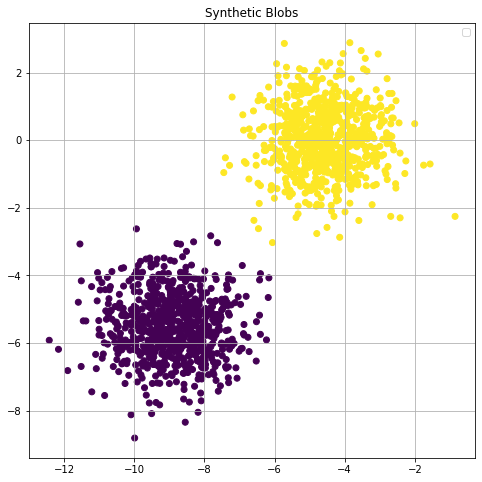

In [3]:
#Plotting synhtetic data
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Synthetic Blobs")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

#SVM  as linear classifier
linear_svc = svm.SVC(kernel = 'linear', C=1, max_iter=10000)
model = linear_svc.fit(x_train, y_train)

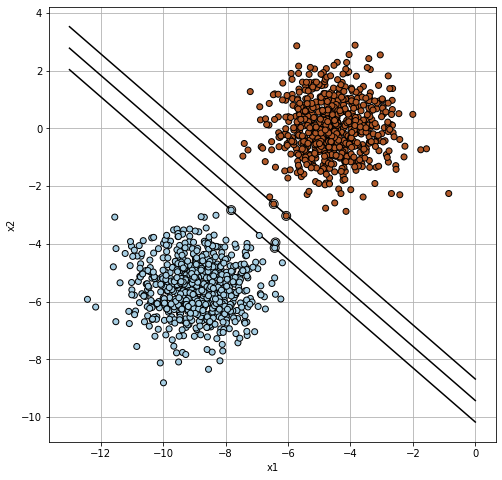

In [5]:
#Plotting the support vectors
w = linear_svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-13, 0)
yy = a * xx - (linear_svc.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(linear_svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [6]:
predict = linear_svc.predict(x_test)
metrics.accuracy_score(y_test, predict)

1.0

In [7]:
#Creating synthetics data with overlapping datapoints
X, Y = make_blobs(n_samples=1500, random_state=170, centers=2, n_features=2, cluster_std=[2.5, 2.5])

No handles with labels found to put in legend.


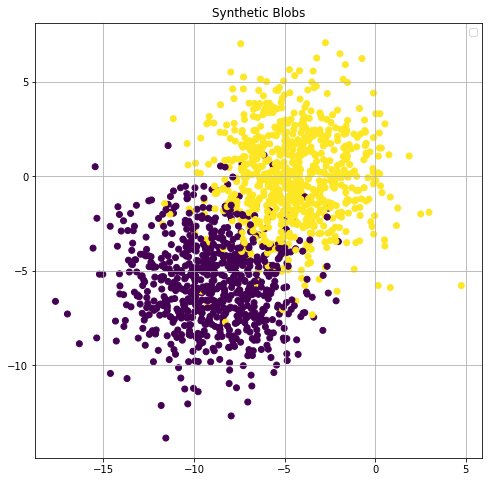

In [8]:
#Plotting synhtetic data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("Synthetic Blobs")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)
#Create a support vector machine with a radial basis function kernel
rbf_svc = SVC(kernel="rbf", gamma=1, C=1)

#Train the classifier
model = rbf_svc.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


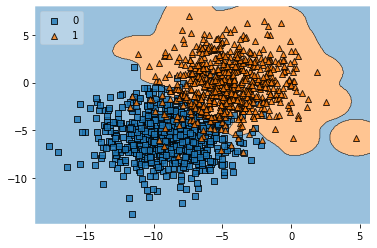

In [10]:
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X_train, 
                      Y_train,
                      clf=rbf_svc, 
                      legend=2)

In [11]:
Predict = rbf_svc.predict(X_test)
metrics.accuracy_score(Y_test, Predict)

0.9133333333333333